In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
dados_clientes = pd.read_csv("C:/Projetos Pessoais/DataScience/segmentacao_Clientes_Ecomerce/data/dados_clientes_clusterizados.csv")

In [39]:
dados_insight = pd.read_csv("C:/Projetos Pessoais/DataScience/segmentacao_Clientes_Ecomerce/data/dados_para_avaliacao_final.csv")

In [41]:
dados_insight.set_index('Cod_cliente', inplace = True)
dados_insight

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos
Cod_cliente,,,,,,,,,
12347,2,182,4310.00,23.68,1,0,615.714286,341.070789,4.486071
12348,75,27,1437.24,53.23,3,0,359.310000,203.875689,-100.884000
12349,18,72,1457.55,20.24,0,0,1457.550000,0.000000,0.000000
12350,310,16,294.40,18.40,2,0,294.400000,0.000000,0.000000
12352,36,77,1385.74,18.00,1,0,346.435000,120.042154,-2.682000
...,...,...,...,...,...,...,...,...,...
21821,1,2,3.35,1.68,3,1,3.350000,0.000000,0.000000
21822,1,634,5699.00,8.99,3,1,5699.000000,0.000000,0.000000
21823,0,730,6756.06,9.25,4,1,6756.060000,0.000000,0.000000


In [7]:
dados_clientes.set_index('Cod_cliente', inplace = True)
dados_clientes

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,
12347,-1.020356,0.726574,1.476625,-0.030005,1,0,0.039694,1.269518,0.066020,2
12348,-0.363187,-0.463910,0.056129,0.281107,3,0,-0.234827,0.553195,-0.571752,1
12349,-0.876319,-0.118286,0.066171,-0.066223,0,0,0.941013,-0.511282,0.038867,0
12350,1.752356,-0.548396,-0.508972,-0.085595,2,0,-0.304323,-0.511282,0.038867,0
12352,-0.714277,-0.079883,0.030663,-0.089806,1,0,-0.248612,0.115483,0.022634,0
...,...,...,...,...,...,...,...,...,...,...
21821,-1.029358,-0.655924,-0.652888,-0.261628,3,1,-0.615939,-0.511282,0.038867,1
21822,-1.029358,4.198178,2.163445,-0.184666,3,1,5.482159,-0.511282,0.038867,2
21823,-1.038360,4.935510,2.686130,-0.181929,4,1,6.613909,-0.511282,0.038867,2


# Entendimento dos Clusters e geração de insights

## Gráfico de radar

- Visualização sumário da distribuição dos clientes nos clusters

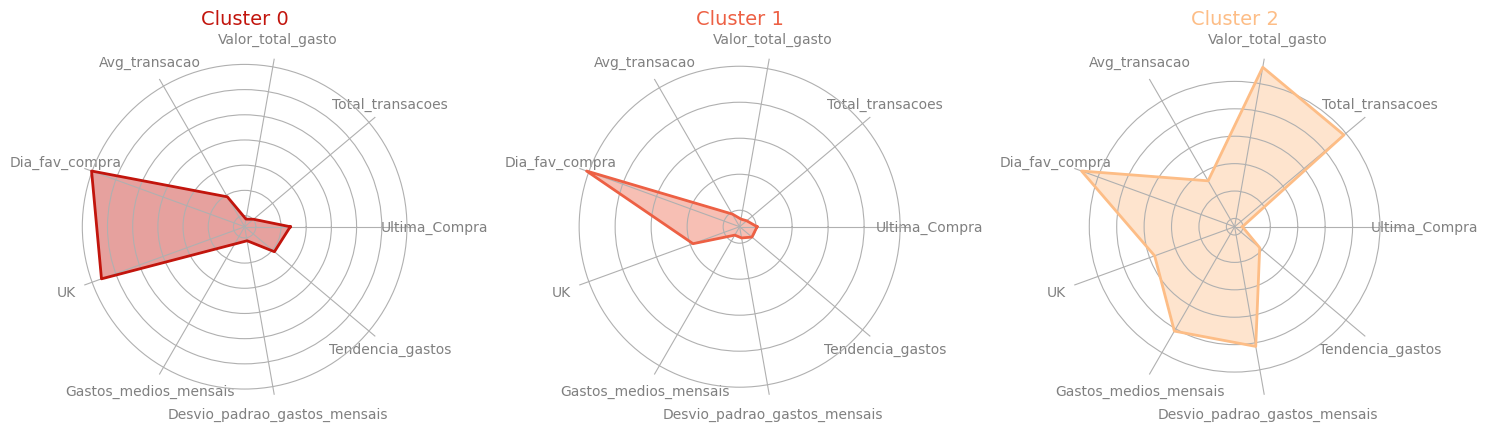

In [35]:
custom_colors = ['#c2150d', '#ed6044', '#fdbd86']

# Lista de rótulos para as variáveis
labels = dados_clientes.columns[:-1]

# Número de clusters
num_clusters = 3

# Crie subplots para 3 gráficos de radar
fig, axes = plt.subplots(1, num_clusters, figsize=(15, 5), subplot_kw={'polar': True})
fig.subplots_adjust(wspace=0.5)

# Função para criar o radar chart para um cluster
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=14, color=color)

for cluster, ax in zip(range(num_clusters), axes):
    # Selecione os dados para o cluster atual
    cluster_data = dados_clientes[dados_clientes['Cluster'] == cluster].drop('Cluster', axis=1).mean().values

    # Complete o círculo com a primeira variável para criar um gráfico fechado
    values = np.concatenate((cluster_data, [cluster_data[0]]))

    # Ângulos para cada variável
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

    # Adicione o primeiro ângulo no final para fechar o gráfico
    angles += angles[:1]

    # Plote o gráfico de radar com a função personalizada
    create_radar_chart(ax, angles, values, custom_colors[cluster], cluster)

    # Personalize o eixo polar
    ax.set_yticklabels([])  # Remova os rótulos do eixo y
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=10, color = 'grey')  # Reduza o tamanho das letras para as variáveis

    # Remova a borda externa do círculo
    ax.spines['polar'].set_visible(False)

# Ajuste o layout
plt.tight_layout()
plt.show()

## Gráfico de barras de cada Cluser

- Entender o comportamento de cada cluster para cada variável 

In [42]:
dados_insight['Cluster'] = dados_clientes['Cluster']

In [43]:
dados_insight

,Ultima_Compra,Total_transacoes,Valor_total_gasto,Avg_transacao,Dia_fav_compra,UK,Gastos_medios_mensais,Desvio_padrao_gastos_mensais,Tendencia_gastos,Cluster
Cod_cliente,,,,,,,,,,
12347,2,182,4310.00,23.68,1,0,615.714286,341.070789,4.486071,2
12348,75,27,1437.24,53.23,3,0,359.310000,203.875689,-100.884000,1
12349,18,72,1457.55,20.24,0,0,1457.550000,0.000000,0.000000,0
12350,310,16,294.40,18.40,2,0,294.400000,0.000000,0.000000,0
12352,36,77,1385.74,18.00,1,0,346.435000,120.042154,-2.682000,0
...,...,...,...,...,...,...,...,...,...,...
21821,1,2,3.35,1.68,3,1,3.350000,0.000000,0.000000,1
21822,1,634,5699.00,8.99,3,1,5699.000000,0.000000,0.000000,2
21823,0,730,6756.06,9.25,4,1,6756.060000,0.000000,0.000000,2


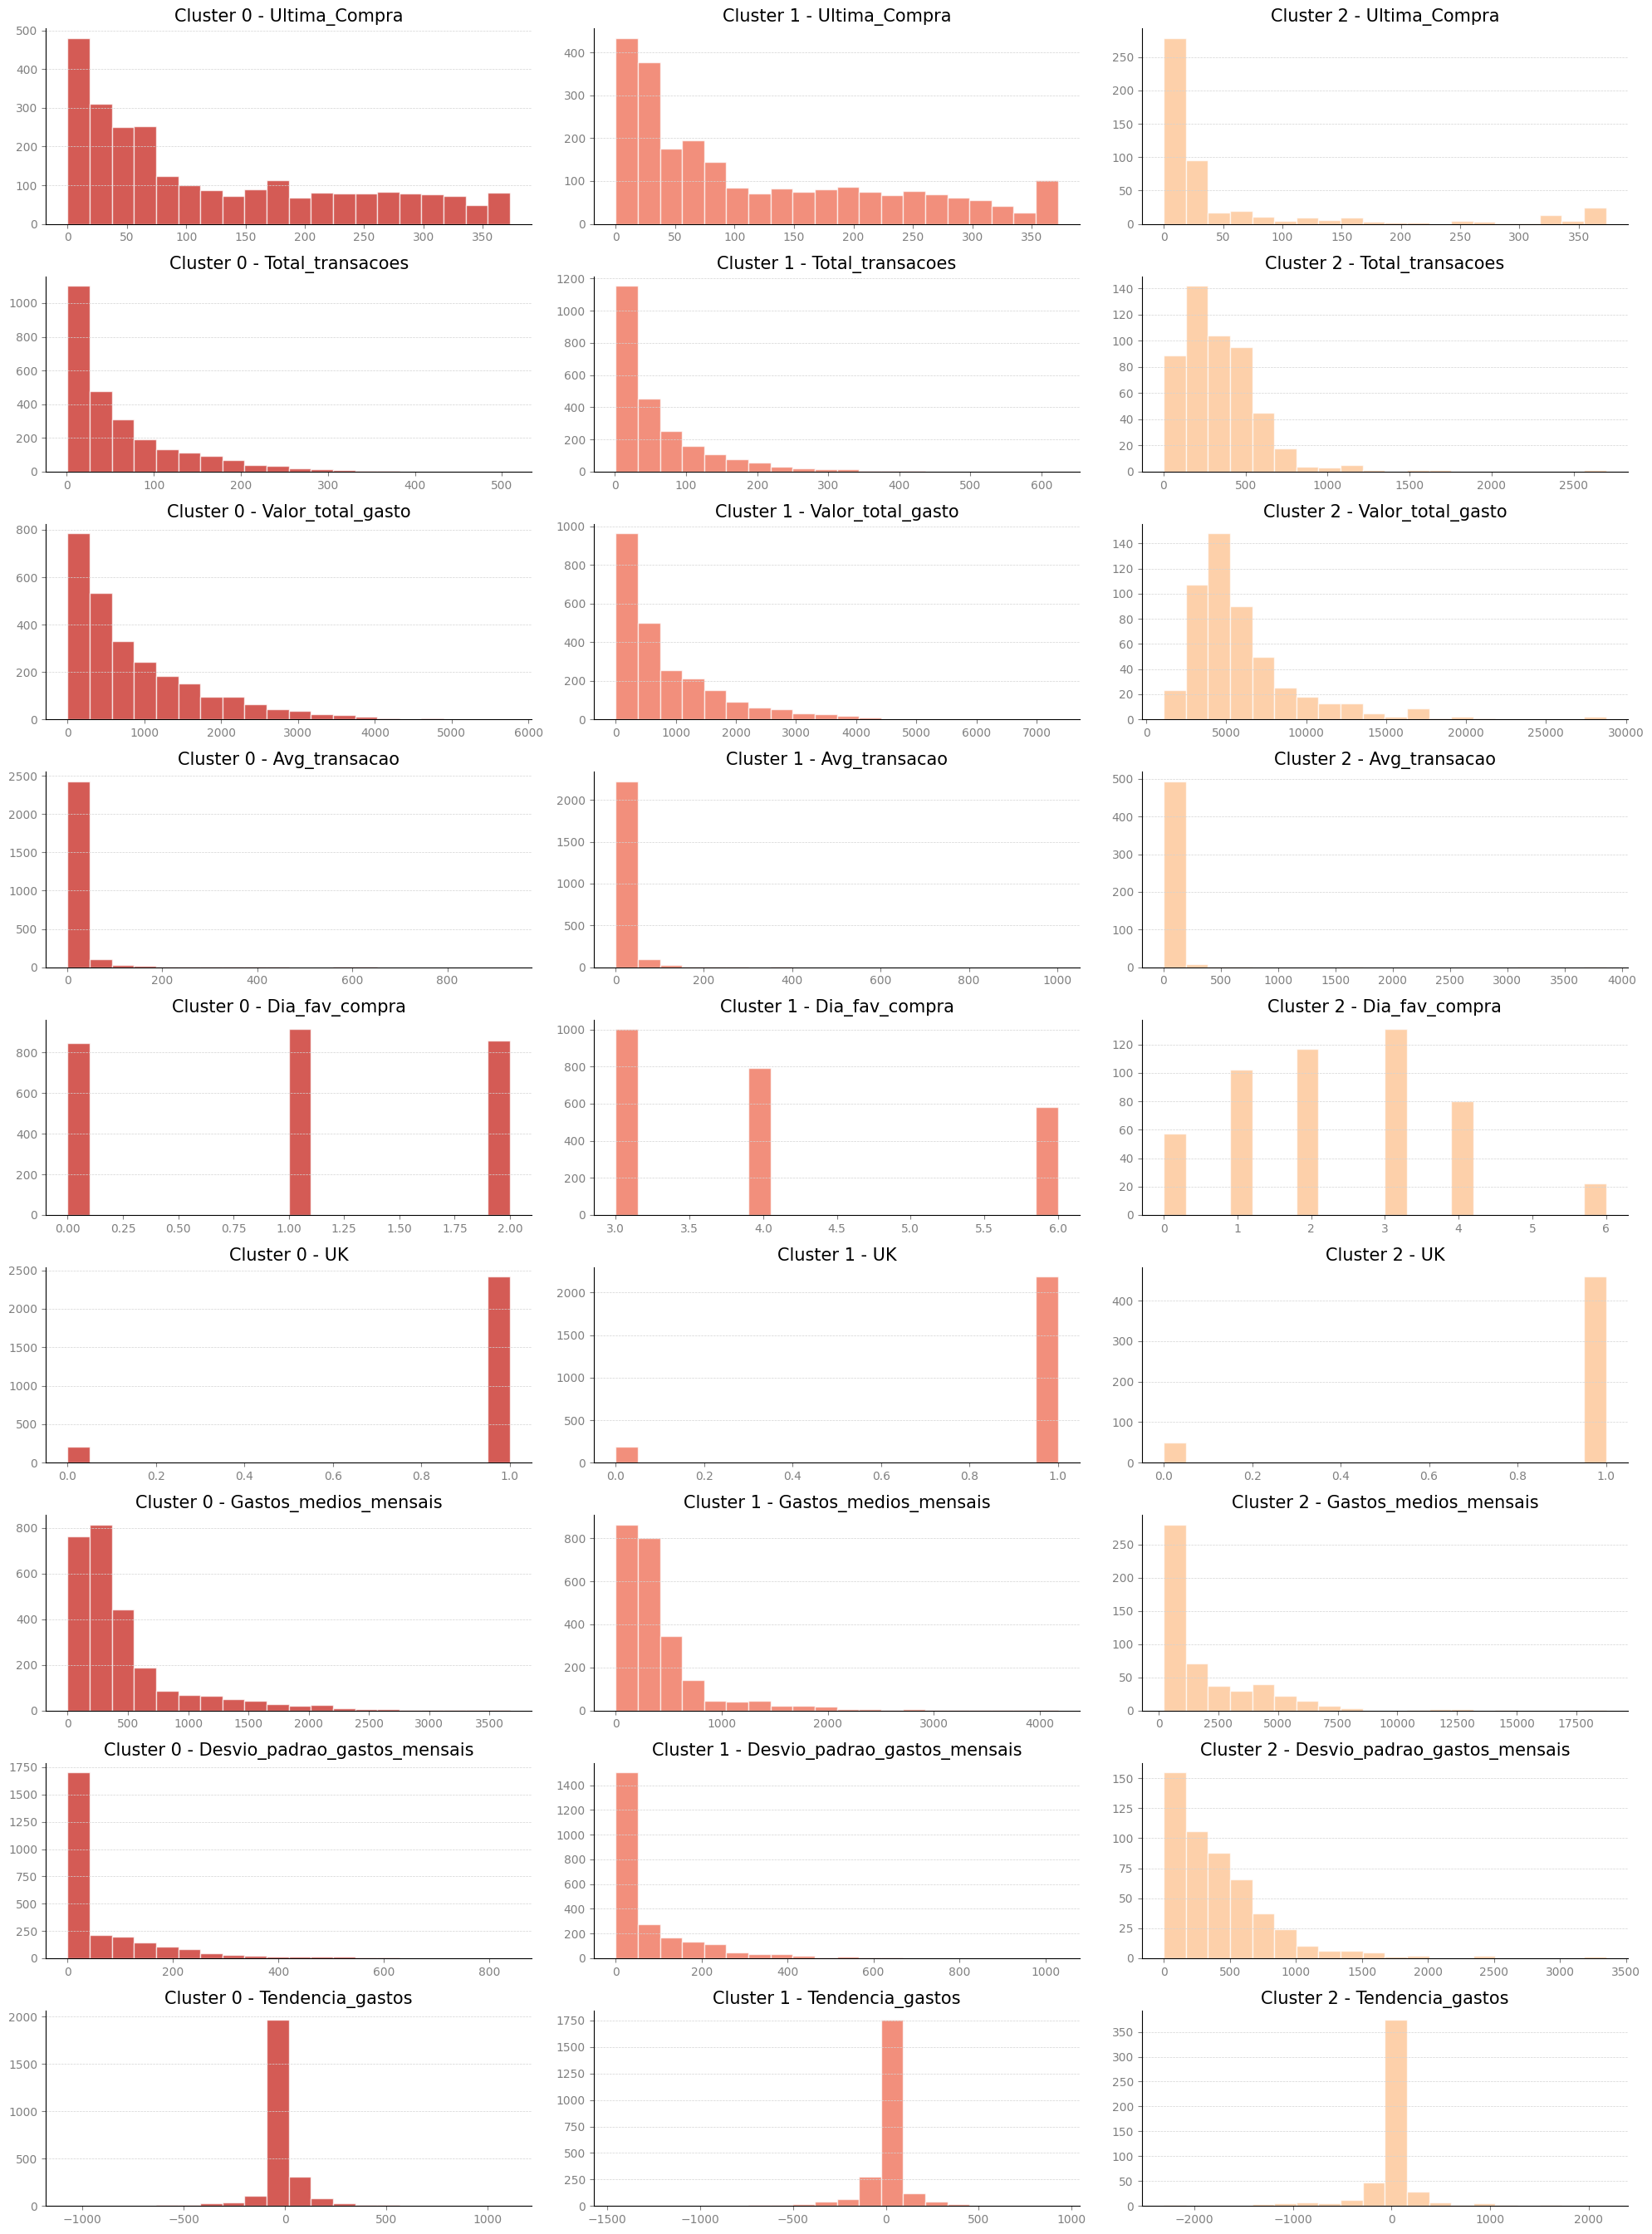

In [64]:
# Plot histograms for each feature segmented by the clusters with custom colors
features = dados_insight.columns[:-1]
clusters = dados_insight['Cluster'].unique()
clusters.sort()

# Defina as cores personalizadas
custom_colors = ['#c2150d', '#ed6044', '#fdbd86']

# Setting up the subplots with increased vertical spacing (hspace)
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms with custom colors
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = dados_insight[dados_insight['Cluster'] == cluster][feature]
        ax = axes[i, j]
        ax.hist(data, bins=20, color=custom_colors[j], edgecolor='w', alpha=0.7)  # Use as cores personalizadas
        ax.set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Remove a borda superior e direita
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adicione linhas de grade finas em lightgrey
        ax.yaxis.grid(color='lightgrey', linestyle='dashed', linewidth=0.5)
        
        # Defina as cores dos ticks do eixo x e y como cinza
        ax.tick_params(axis='x', colors='gray')
        ax.tick_params(axis='y', colors='gray')

# Ajustando o layout para evitar sobreposições
plt.tight_layout()
plt.show()

# Avaliação dos Clusters

### Cluster 0:
- dsa
-
-
-
-
-
-


### Cluster 1:
- dsa
-
-
-
-
-
-
-


### Cluster 2:
- dsa
-
-
-
-
-
-
-
